In [1]:
# import dependencies
import base64
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from ohmysportsfeedspy import MySportsFeeds
import gmaps
import json

from config import api_key
from config import g_key

# configure MySportsFeeds API
msf = MySportsFeeds(version="2.0")
msf.authenticate(api_key, "MYSPORTSFEEDS")

In [2]:
# Retrieve player seasonal stat totals from MySportsFeed API
output = msf.msf_get_data(league='nfl',season='2019-2020-regular',feed='seasonal_player_stats',format='json')
player_list = output['playerStatsTotals']
player_list[0]

{'player': {'id': 6826,
  'firstName': 'Ameer',
  'lastName': 'Abdullah',
  'primaryPosition': 'RB',
  'jerseyNumber': 31,
  'currentTeam': {'id': 63, 'abbreviation': 'MIN'},
  'currentRosterStatus': 'ROSTER',
  'currentInjury': None,
  'height': '5\'9"',
  'weight': 203,
  'birthDate': '1993-06-13',
  'age': 26,
  'birthCity': 'Mobile, AL',
  'birthCountry': 'USA',
  'rookie': False,
  'highSchool': None,
  'college': 'Nebraska',
  'handedness': None,
  'officialImageSrc': 'http://static.nfl.com/static/content/public/static/img/fantasy/transparent/200x200/ABD647726.png',
  'socialMediaAccounts': []},
 'team': {'id': 63, 'abbreviation': 'MIN'},
 'stats': {'gamesPlayed': 16,
  'passing': {'passAttempts': 0,
   'passCompletions': 0,
   'passPct': 0.0,
   'passYards': 0,
   'passAvg': 0.0,
   'passYardsPerAtt': 0.0,
   'passTD': 0,
   'passTDPct': 0.0,
   'passInt': 0,
   'passIntPct': 0.0,
   'passLng': 0,
   'pass20Plus': 0,
   'pass40Plus': 0,
   'passSacks': 0,
   'passSackY': 0,
   '

In [3]:
# Create a dataframe for the API data

num_records = len(player_list)

stats_df = pd.DataFrame(columns=['Name', 'Position', 'Team', 'Age', 'birthCity', 'College',
                                   'passYards', 'passYPA', 'passTD', 'passInt', 'qbRating',
                                   'rushAttempts', 'rushYards', 'rushAverage', 'rushTD', 
                                   'Targets', 'Receptions', 'recYards', 'recAverage', 'recTD',
                                   'Tackles', 'Sacks', 'TFL', 'Interceptions', 'intTD', 'passesDefended', 'Safeties',
                                   'fumblesForced', 'fumbleTD'], index=range(0, num_records))
stats_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,recTD,Tackles,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Retrieve the data from the MySportsFeed API and put it into the dataframe

for index, row in stats_df.iterrows():
    
    try:
        stats_df.loc[index, 'Name'] = player_list[index]['player']['firstName'] + " " + player_list[index]['player']['lastName']
        stats_df.loc[index, 'Position'] = player_list[index]['player']['primaryPosition']
        stats_df.loc[index, 'Team'] = player_list[index]['team']['abbreviation']
        stats_df.loc[index, 'Age'] = player_list[index]['player']['age']
        stats_df.loc[index, 'birthCity'] = player_list[index]['player']['birthCity']
        stats_df.loc[index, 'College'] = player_list[index]['player']['college']
        stats_df.loc[index, 'passYards'] = player_list[index]['stats']['passing']['passYards']
        stats_df.loc[index, 'passYPA'] = player_list[index]['stats']['passing']['passYardsPerAtt']
        stats_df.loc[index, 'passTD'] = player_list[index]['stats']['passing']['passTD']
        stats_df.loc[index, 'passInt'] = player_list[index]['stats']['passing']['passInt']
        stats_df.loc[index, 'qbRating'] = player_list[index]['stats']['passing']['qbRating']
        stats_df.loc[index, 'rushAttempts'] = player_list[index]['stats']['rushing']['rushAttempts']
        stats_df.loc[index, 'rushYards'] = player_list[index]['stats']['rushing']['rushYards']
        stats_df.loc[index, 'rushAverage'] = player_list[index]['stats']['rushing']['rushAverage']
        stats_df.loc[index, 'rushTD'] = player_list[index]['stats']['rushing']['rushTD']
        stats_df.loc[index, 'Targets'] = player_list[index]['stats']['receiving']['targets']
        stats_df.loc[index, 'Receptions'] = player_list[index]['stats']['receiving']['receptions']
        stats_df.loc[index, 'recYards'] = player_list[index]['stats']['receiving']['recYards']
        stats_df.loc[index, 'recAverage'] = player_list[index]['stats']['receiving']['recAverage']
        stats_df.loc[index, 'recTD'] = player_list[index]['stats']['receiving']['recTD']
        stats_df.loc[index, 'Tackles'] = player_list[index]['stats']['tackles']['tackleTotal']
        stats_df.loc[index, 'Sacks'] = player_list[index]['stats']['tackles']['sacks']
        stats_df.loc[index, 'TFL'] = player_list[index]['stats']['tackles']['tacklesForLoss']
        stats_df.loc[index, 'Interceptions'] = player_list[index]['stats']['interceptions']['interceptions']
        stats_df.loc[index, 'intTD'] = player_list[index]['stats']['interceptions']['intTD']
        stats_df.loc[index, 'passesDefended'] = player_list[index]['stats']['interceptions']['passesDefended']
        stats_df.loc[index, 'Safeties'] = player_list[index]['stats']['interceptions']['safeties']
        stats_df.loc[index, 'fumblesForced'] = player_list[index]['stats']['fumbles']['fumForced']
        stats_df.loc[index, 'fumbleTD'] = player_list[index]['stats']['fumbles']['fumTD']
    
    except:
        pass
        
stats_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,recTD,Tackles,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,1,7,0,0,0,0,0,0,0,0
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4715,Dave Zastudil,P,ARI,None,None,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4716,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,Isaac Zico,WR,ARI,23,None,Purdue,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4718,Frank Zombo,LB,KC,None,None,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Drop any rows where there is no age data for player
# Clean the data by removing any ages under 18 (there were a few rows where the age was 1)
stats_df = stats_df[stats_df['Age'].notna()]
stats_df['Age'] = pd.to_numeric(stats_df['Age'])
stats_df = stats_df[stats_df['Age'] > 18]
stats_df

C:\Users\matts\Anaconda3\envs\PythonData_RU_2020\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,recTD,Tackles,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,1,7,0,0,0,0,0,0,0,0
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4714,Adam Zaruba,TE,PHI,29,None,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4716,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4717,Isaac Zico,WR,ARI,23,None,Purdue,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


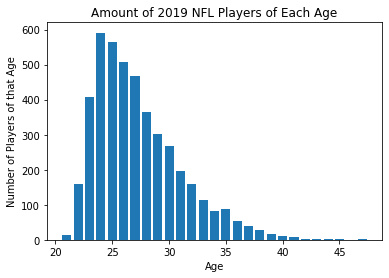

In [6]:
# Create the bar plot for total players of each age
# groups by age
age_count = stats_df["Age"].value_counts()
age_count
# turns series into df
age_count = age_count.to_frame()
# resets index so age is a column
age_count = age_count.reset_index()
# renames columns
age_count = age_count.rename(columns={"index":"Age", "Age":"Number of Players of that Age"})
age_count
# sorts by age
age_count = age_count.sort_values("Age")
age_count


# plots and saves bar graph of how many players there are of each age
plt.bar(age_count["Age"], age_count["Number of Players of that Age"])
plt.xlabel('Age')
plt.ylabel('Number of Players of that Age')
plt.title("Amount of 2019 NFL Players of Each Age")
plt.savefig("Images/player_bar_plot.png")

In [7]:
# Add Lat/Lng columns to dataframe
stats_df['Lat'] = ""
stats_df['Lng'] = ""
stats_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,0,,
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4714,Adam Zaruba,TE,PHI,29,None,None,0,0,0,0,...,0,0,0,0,0,0,0,0,,
4716,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4717,Isaac Zico,WR,ARI,23,None,Purdue,0,0,0,0,...,0,0,0,0,0,0,0,0,,


In [8]:
# Create the city df by taking the original df and removing any row where there was no bith city
city_df = stats_df[stats_df['birthCity'].notna()]
city_df = city_df.reset_index(drop=True)
city_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,0,,
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4,Davante Adams,WR,GB,27,"Palo Alto, CA",Fresno State,0,0,0,0,...,0,0,0,0,0,0,0,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,Sam Young,OT,MIA,32,"Dayton, OH",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2835,Usama Young,DT,OAK,34,"Washington, DC",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2836,Christian Yount,G,CLE,31,"San Pedro, CA",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2837,Ishmael Zamora,WR,OAK,24,"Houston, TX",None,0,0,0,0,...,0,0,0,0,0,0,0,0,,


In [9]:
# Configure gmaps
gmaps.configure(api_key=g_key)

In [10]:
# Use gogle geocode API to retrieve the Lat/Lng for each player's birth city
for index, row in city_df.iterrows():
    try:
        target_city = city_df.loc[index, 'birthCity']
            
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(target_city, g_key)

        geo_data = requests.get(target_url).json()

        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        city_df.loc[index, 'Lat'] = lat
        city_df.loc[index, 'Lng'] = lng
    
    except:
        pass
    
city_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,0,30.6954,-88.0399
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6782,-73.9442
2,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.7767,-96.797
3,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.4486,-84.4551
4,Davante Adams,WR,GB,27,"Palo Alto, CA",Fresno State,0,0,0,0,...,0,0,0,0,0,0,0,0,37.4419,-122.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,Sam Young,OT,MIA,32,"Dayton, OH",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.7589,-84.1916
2835,Usama Young,DT,OAK,34,"Washington, DC",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.9072,-77.0369
2836,Christian Yount,G,CLE,31,"San Pedro, CA",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.7361,-118.292
2837,Ishmael Zamora,WR,OAK,24,"Houston, TX",None,0,0,0,0,...,0,0,0,0,0,0,0,0,29.7604,-95.3698


In [11]:
# Convert Lat/Lng to numeric and drop any rows where there is no Lat/Lng data
city_df['Lat'] = pd.to_numeric(city_df['Lat'])
city_df['Lng'] = pd.to_numeric(city_df['Lng'])

city_df = city_df[city_df['Lat'].notna()]
city_df = city_df[city_df['Lng'].notna()]
city_df = city_df.reset_index(drop=True)
city_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,0,30.695366,-88.039891
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.678178,-73.944158
2,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.776664,-96.796988
3,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.448644,-84.455087
4,Davante Adams,WR,GB,27,"Palo Alto, CA",Fresno State,0,0,0,0,...,0,0,0,0,0,0,0,0,37.441883,-122.143019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,Sam Young,OT,MIA,32,"Dayton, OH",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.758948,-84.191607
2834,Usama Young,DT,OAK,34,"Washington, DC",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.907192,-77.036871
2835,Christian Yount,G,CLE,31,"San Pedro, CA",None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.736062,-118.292246
2836,Ishmael Zamora,WR,OAK,24,"Houston, TX",None,0,0,0,0,...,0,0,0,0,0,0,0,0,29.760427,-95.369803


In [12]:
# Create heatmap image for birth cities
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(city_df[["Lat", "Lng"]])
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [13]:
# Crteate df for colleges by dropping any rows where there is no college data
college_df = stats_df[stats_df['College'].notna()]
college_df = college_df.reset_index(drop=True)
college_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,0,,
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Marquis Young,RB,IND,23,"New York, NY",Mssachusetts,0,0,0,0,...,0,0,0,0,0,0,0,0,,
3560,Trevon Young,LB,LA,25,None,Louisville,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3561,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,
3562,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,


In [14]:
# Use gogle geocode API to retrieve the Lat/Lng for each player's college
for index, row in college_df.iterrows():
    try:
        target = college_df.loc[index, 'College']
            
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
            'address={0}&key={1}').format(target, g_key)

        geo_data = requests.get(target_url).json()

        lat = geo_data["results"][0]["geometry"]["location"]["lat"]
        lng = geo_data["results"][0]["geometry"]["location"]["lng"]

        college_df.loc[index, 'Lat'] = lat
        college_df.loc[index, 'Lng'] = lng
    
    except:
        pass
    
college_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,0,41.4925,-99.9018
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4316,-78.6569
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.4552,-88.7944
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.9686,-99.9018
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.8077,-72.254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,Marquis Young,RB,IND,23,"New York, NY",Mssachusetts,0,0,0,0,...,0,0,0,0,0,0,0,0,42.4072,-71.3824
3560,Trevon Young,LB,LA,25,None,Louisville,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.2527,-85.7585
3561,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.2827,-85.6147
3562,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.4406,-79.9959


In [15]:
# Convert Lat/Lng to numeric and drop any rows where there is no Lat/Lng data
college_df['Lat'] = pd.to_numeric(college_df['Lat'])
college_df['Lng'] = pd.to_numeric(college_df['Lng'])

college_df = college_df[college_df['Lat'].notna()]
college_df = college_df[college_df['Lng'].notna()]
college_df = college_df.reset_index(drop=True)
college_df

,Name,Position,Team,Age,birthCity,College,passYards,passYPA,passTD,passInt,...,Sacks,TFL,Interceptions,intTD,passesDefended,Safeties,fumblesForced,fumbleTD,Lat,Lng
0,Ameer Abdullah,RB,MIN,26,"Mobile, AL",Nebraska,0,0,0,0,...,0,0,0,0,0,0,0,0,41.492537,-99.901813
1,Oday Aboushi,G,DET,28,"Brooklyn, NY",Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.431573,-78.656894
2,Johnathan Abram,FS,OAK,23,None,Mississippi State,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.455174,-88.794377
3,Sam Acho,LB,TB,31,"Dallas, TX",Texas,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.968599,-99.901813
4,Andrew Adams,FS,TB,27,"Fayetteville, GA",UConn,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.807741,-72.253980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,Marquis Young,RB,IND,23,"New York, NY",Mssachusetts,0,0,0,0,...,0,0,0,0,0,0,0,0,42.407211,-71.382437
3557,Trevon Young,LB,LA,25,None,Louisville,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.252665,-85.758456
3558,Ronald Zamort,CB,NYG,28,None,Western Michigan,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.282671,-85.614674
3559,Elijah Zeise,LB,LAC,24,None,Pittsburgh,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.440625,-79.995886


In [16]:
# Create heatmap image for colleges
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(college_df[["Lat", "Lng"]])
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
# Create a df for QBs by filtering the original df by position QB and drop all non-qb relevant stat columns
qb_df = stats_df[stats_df['Position'] == 'QB']
qb_df = qb_df[['Name', 'Position', 'Team', 'Age','passYards', 'passYPA', 'passTD', 'passInt', 'qbRating']]

# Drop any rows where a player had 0 passing yards or had no age data
qb_df = qb_df[qb_df['Age'].notna()]
qb_df = qb_df[qb_df['passYards'] > 0]

# Create a production metric by adding total pass yards and total TD*70
qb_df['production'] = qb_df['passYards'] + (qb_df['passTD'] * 70)

# Convert fields to numeric
qb_df['Age'] = pd.to_numeric(qb_df['Age'])
qb_df['passYards'] = pd.to_numeric(qb_df['passYards'])
qb_df['passYPA'] = pd.to_numeric(qb_df['passYPA'])
qb_df['passTD'] = pd.to_numeric(qb_df['passTD'])
qb_df['passInt'] = pd.to_numeric(qb_df['passInt'])
qb_df['qbRating'] = pd.to_numeric(qb_df['qbRating'])
qb_df['production'] = pd.to_numeric(qb_df['production'])

# Sort on production
qb_df = qb_df.sort_values("production", ascending=False)
qb_df

,Name,Position,Team,Age,passYards,passYPA,passTD,passInt,qbRating,production
2102,Jameis Winston,QB,TB,26,5109,8.2,33,30,84.3,7419
1538,Dak Prescott,QB,DAL,26,4901,8.2,30,11,99.7,7001
1644,Matt Ryan,QB,ATL,34,4466,7.2,26,14,92.1,6286
2092,Russell Wilson,QB,SEA,31,4111,8.0,31,5,106.3,6281
1606,Philip Rivers,QB,LAC,38,4615,7.8,23,20,88.5,6225
...,...,...,...,...,...,...,...,...,...,...
190,Tim Boyle,QB,GB,25,15,3.8,0,0,80.2,15
1814,Jarrett Stidham,QB,NE,23,14,3.5,0,1,18.8,14
1723,Trevor Siemian,QB,NYJ,28,3,0.5,0,0,56.2,3
176,Blake Bortles,QB,LA,27,3,1.5,0,0,56.2,3


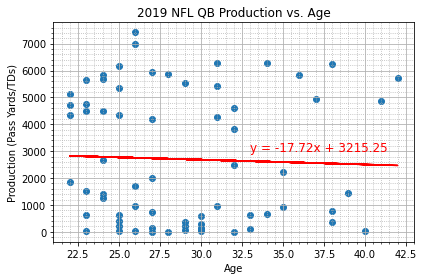

The r-squared is: 0.0014539331339513337
The correlation is: -0.04


<Figure size 432x288 with 0 Axes>

In [18]:
# Create plot for QB age vs. production
x_values = qb_df['Age']
y_values = qb_df['production']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title("2019 NFL QB Production vs. Age")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(33, 3000),fontsize=12,color="red")
plt.xlabel('Age')
plt.ylabel('Production (Pass Yards/TDs)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()



print(f"The r-squared is: {rvalue**2}")
print(f"The correlation is: {round(correlation[0],2)}")

plt.savefig("Images/qb_scatter_plot.png")

In [19]:
# Create a df for RBs by filtering the original df by position RB and drop all non-rb relevant stat columns
rb_df = stats_df[stats_df['Position'] == 'RB']
rb_df = rb_df[['Name', 'Position', 'Team', 'Age', 'rushAttempts', 'rushYards', 'rushAverage', 'rushTD',
              'Targets', 'Receptions', 'recYards', 'recAverage', 'recTD',]]

# Drop any rows where a player had 0 rushing yards or had no age data
rb_df = rb_df[rb_df['Age'].notna()]
rb_df = rb_df[rb_df['rushYards'] > 0]

# Create a production metric by adding total rush yards, receiving yards and total TD*70
rb_df['production'] = rb_df['rushYards'] + rb_df['recYards'] + (rb_df['rushTD'] * 70) + (rb_df['recTD'] * 70)

# Convert fields to numeric
rb_df['Age'] = pd.to_numeric(rb_df['Age'])
rb_df['rushAttempts'] = pd.to_numeric(rb_df['rushAttempts'])
rb_df['rushYards'] = pd.to_numeric(rb_df['rushYards'])
rb_df['rushAverage'] = pd.to_numeric(rb_df['rushAverage'])
rb_df['rushTD'] = pd.to_numeric(rb_df['rushTD'])
rb_df['Targets'] = pd.to_numeric(rb_df['Targets'])
rb_df['Receptions'] = pd.to_numeric(rb_df['Receptions'])
rb_df['recYards'] = pd.to_numeric(rb_df['recYards'])
rb_df['recAverage'] = pd.to_numeric(rb_df['recAverage'])
rb_df['recTD'] = pd.to_numeric(rb_df['recTD'])
rb_df['production'] = pd.to_numeric(rb_df['production'])

# Sort df by production
rb_df = rb_df.sort_values("production", ascending=False)
rb_df

,Name,Position,Team,Age,rushAttempts,rushYards,rushAverage,rushTD,Targets,Receptions,recYards,recAverage,recTD,production
1262,Christian McCaffrey,RB,CAR,23,287,1387,4.8,15,143,116,1005,8.7,4,3722
823,Derrick Henry,RB,TEN,26,303,1539,5.1,16,25,18,206,11.4,2,3005
1029,Aaron Jones,RB,GB,25,236,1084,4.6,16,69,49,474,9.7,3,2888
552,Ezekiel Elliott,RB,DAL,24,301,1357,4.5,12,71,54,419,7.8,2,2756
381,Dalvin Cook,RB,MIN,24,250,1135,4.5,13,63,53,519,9.8,0,2564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,Zach Zenner,RB,NO,28,1,1,1.0,0,2,1,6,6.0,0,7
1923,De'Lance Turner,RB,MIA,24,4,6,1.5,0,0,0,0,0.0,0,6
1499,Senorise Perry,RB,BUF,28,3,3,1.0,0,1,1,1,1.0,0,4
1362,Alfred Morris,RB,ARI,31,1,4,4.0,0,0,0,0,0.0,0,4


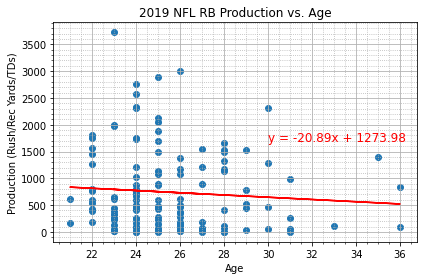

The r-squared is: 0.005935676685080637
The correlation is: -0.08


<Figure size 432x288 with 0 Axes>

In [20]:
# Create plot for RB age vs. production
x_values = rb_df['Age']
y_values = rb_df['production']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title("2019 NFL RB Production vs. Age")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 1700),fontsize=12,color="red")
plt.xlabel('Age')
plt.ylabel('Production (Rush/Rec Yards/TDs)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()



print(f"The r-squared is: {rvalue**2}")
print(f"The correlation is: {round(correlation[0],2)}")

plt.savefig("Images/rb_scatter_plot.png")

In [21]:
# Create a df for WR/TE by filtering the original df by position WR and TE and drop all non-wr/te relevant stat columns
wr_df = stats_df.loc[(stats_df['Position'] == 'WR') | (stats_df['Position'] == 'TE')]
wr_df = wr_df[['Name', 'Position', 'Team', 'Age', 'Targets', 'Receptions', 'recYards', 'recAverage', 'recTD']]

# Drop any rows where a player had 0 receiving yards or had no age data
wr_df = wr_df[wr_df['Age'].notna()]
wr_df = wr_df[wr_df['recYards'] > 0]

# Create a production metric by adding total receiving yards and total TD*70
wr_df['production'] = wr_df['recYards'] + (wr_df['recTD'] * 70)

# Convert fields to numeric
wr_df['Age'] = pd.to_numeric(wr_df['Age'])
wr_df['Targets'] = pd.to_numeric(wr_df['Targets'])
wr_df['Receptions'] = pd.to_numeric(wr_df['Receptions'])
wr_df['recYards'] = pd.to_numeric(wr_df['recYards'])
wr_df['recAverage'] = pd.to_numeric(wr_df['recAverage'])
wr_df['recTD'] = pd.to_numeric(wr_df['recTD'])
wr_df['production'] = pd.to_numeric(wr_df['production'])

# Sort df by production
wr_df = wr_df.sort_values("production", ascending=False)
wr_df

,Name,Position,Team,Age,Targets,Receptions,recYards,recAverage,recTD,production
1880,Michael Thomas,WR,NO,27,186,149,1725,11.6,9,2355
691,Chris Godwin,WR,TB,24,119,86,1333,15.5,9,1963
696,Kenny Golladay,WR,DET,26,116,65,1190,18.3,11,1960
1127,Cooper Kupp,WR,LA,26,134,94,1162,12.4,10,1862
1471,DeVante Parker,WR,MIA,27,128,72,1202,16.7,9,1832
...,...,...,...,...,...,...,...,...,...,...
863,Krishawn Hogan,WR,NO,24,1,1,4,4.0,0,4
736,Xavier Grimble,TE,PIT,27,3,1,3,3.0,0,3
721,Cyril Grayson Jr.,WR,TB,26,1,1,3,3.0,0,3
1902,Eric Tomlinson,TE,NE,27,1,1,1,1.0,0,1


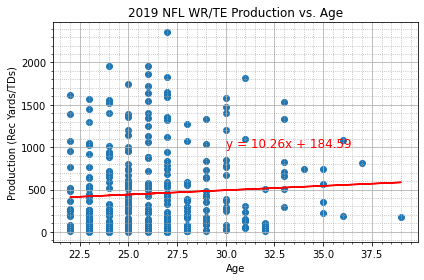

The r-squared is: 0.003906829753255059
The correlation is: 0.06


<Figure size 432x288 with 0 Axes>

In [22]:
# Create plot for WR/TE age vs. production
x_values = wr_df['Age']
y_values = wr_df['production']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title("2019 NFL WR/TE Production vs. Age")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30, 1000),fontsize=12,color="red")
plt.xlabel('Age')
plt.ylabel('Production (Rec Yards/TDs)')
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()



print(f"The r-squared is: {rvalue**2}")
print(f"The correlation is: {round(correlation[0],2)}")

plt.savefig("Images/wr_scatter_plot.png")